# Modeling Exotic Option Prices with Monte Carlo

**Brendan Reid, Calvin Combs, Dalton Fowler, Xander Struntz**

## Introduction

In [26]:
!pip install numpy
!pip install matplotlib

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Author: Calvin Combs

# generates matrix of stock paths.
# columns represent path of a stock at each time step.
# each stock starts from the same price.

# parameters:
# S0: initial stock price
# mu: expected return of stock
# sig: standard deviation of stock price
# dt: size of time step
# steps: number of time steps to generate
# numPaths: number of stock paths to generate
def assetPaths(S0,mu,sig,dt,steps,numPaths):
    drift = mu - sig*sig/2
    
    cProd = np.cumprod(np.exp(drift*dt+sig*np.sqrt(dt)*np.random.normal(0, 1, (steps,numPaths))), axis=0)

    # build array   
    S = S0 * (np.append(np.ones((1,numPaths)), (cProd)))
    
    return S

We give some examples of calling `assetPaths()`. (This is for personal reference, we might want to delete these when we submit this project).

In [29]:
# Note the strange formatting. This is because of python's print() function.
# If we want an option to pretty print these for any number of paths,
# we can build our own pretty print function.
one = assetPaths(100, .15, .3, 1/4, 5, 3)
print(one)

[100.         100.         100.          90.00802099  75.34504046
 113.06830916  91.16524965  82.21608294 110.50037674  79.66113346
  85.40624105 116.3654562   92.24439227  82.9871226  146.02124516
  85.98119193  84.34891776 154.11597425]


In [30]:
two = assetPaths(100, .8, .9, 1/12, 10, 5)
print(two)

[100.         100.         100.         100.         100.
 160.01829052  75.12046883  89.35444936 123.86038712 135.22586121
 166.00476205 136.11507419  85.99306485 153.33765666 150.89186496
 160.49035243 184.30464381  83.36976801 123.14012435 192.85037064
 169.69809546 199.42313635 126.77607417  68.5700011  302.55481623
 222.77876889 147.37404024 188.51948055  89.82637011 290.71630707
 277.29796923 119.03759025 163.23369192  68.76076811 260.73431809
 233.91215923 113.14564553 222.22644673  56.07742948 213.03410575
 224.47168604 123.17463086 236.42853811  42.65841154 215.83164886
 221.99375055 120.45799123 365.1028692   34.81031352 199.51580469
 210.92163071  78.95286263 315.88888935  23.72039725 211.62909367]


In [31]:
# Simple functions to find the max and min of a array.
# We will be using these to help plot our outputs.

# NOTE: I thought I needed this for plotting but it appears not
# leaving incase we need at another time.
def getMax(arr):
    max = arr[0]
    for x in arr[1:]:
        if x > max:
            max = x
    return max

def getMin(arr):
    min = arr[0]
    for x in arr[1:]:
        if x < min:
            min = x
    return min

In [32]:
# Here we test the functions by a very straightforward test
print(getMax(one), getMin(one), sep="|")
print(getMax(two), getMin(two), sep="|")

154.11597425038423|75.34504045683956
365.10286919650474|23.72039724902529


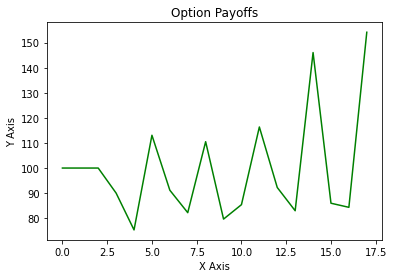

In [40]:
# Plot the first asset path
plt.title("Option Payoffs")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
x = np.arange(0, len(one))
y = np.array(one)
plt.plot(x, y, color = "green")
plt.show()

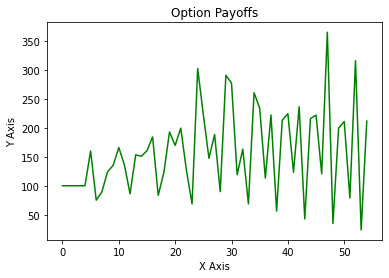

In [41]:
# Plot the second asset path
plt.title("Option Payoffs")
plt.xlabel("X Axis")
plt.ylabel("Y Axis")
x = np.arange(0, len(two))
y = np.array(two)
plt.plot(x, y, color = "green")
plt.show()